In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from scipy.spatial.distance import euclidean as euc
import numpy as np
from sklearn.datasets import make_classification
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import plot_confusion_matrix, plot_roc_curve, classification_report, roc_auc_score, plot_roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
np.random.seed(0)
import pickle
from sklearn.model_selection import GridSearchCV
import dtale
from tqdm import tqdm
from nba_all_modeling_functions import nba_log_regression, nba_knn, nba_random_forest, nba_svc

pd.set_option("display.max_rows", 600)
pd.set_option("display.max_columns", 60)
%matplotlib inline

## Pickling in "all_data_df"

In [2]:
with open("all_data.pickle", "rb") as to_read:
    all_data_df = pickle.load(to_read)

In [3]:
with open("holdout_season_1.pickle", "rb") as to_read:
    holdout_season_1 = pickle.load(to_read)

In [5]:
holdout_season_1

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,FG,FGA,...,PTS/game average,PTS/game relative,ORB/game,ORB/game average,ORB/game relative,DRB/game,DRB/game average,DRB/game relative,TRB/game,TRB/game average,TRB/game relative,STL/game,STL/game average,STL/game relative,BLK/game,BLK/game average,BLK/game relative,MP/game,MP/game average,MP/game relative,3P/game,3P/game average,3P/game relative,FT/game,FT/game average,FT/game relative,FTA/game,FTA/game average,FTA/game relative,Years from prime
"Player, year",,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
"Quincy Acy, 2016",2016,Quincy Acy,PF,25.0,SAC,59.0,29.0,876.0,14.7,0.629,0.229,0.318,8.1,15.1,11.6,4.4,1.6,2.2,10.0,13.1,1.8,0.7,2.5,0.137,0.2,0.0,0.2,0.5,119.0,214.0,...,8.5,-0.6,1.1,0.9,0.3,2.1,2.8,-0.4,3.2,3.7,-0.2,0.5,0.7,-0.4,0.4,0.4,-0.0,14.8,20.4,-0.6,0.3,0.7,-0.6,0.8,1.5,-0.5,1.2,1.9,-0.5,2.0
"Steven Adams, 2016",2016,Steven Adams,C,22.0,OKC,80.0,80.0,2014.0,15.5,0.621,0.000,0.460,12.5,16.1,14.4,4.3,1.0,3.3,14.1,12.6,4.2,2.3,6.5,0.155,0.8,1.3,2.1,2.1,261.0,426.0,...,8.5,-0.1,2.7,0.9,2.3,3.9,2.8,0.6,6.7,3.7,1.3,0.5,0.7,-0.4,1.1,0.4,1.5,25.2,20.4,0.5,0.0,0.7,-1.0,1.4,1.5,-0.0,2.4,1.9,0.3,5.0
"Arron Afflalo, 2016",2016,Arron Afflalo,SG,30.0,NYK,71.0,57.0,2371.0,10.9,0.531,0.298,0.164,1.1,11.0,6.1,9.9,0.5,0.3,8.7,17.9,1.8,0.9,2.7,0.055,-0.6,-1.8,-2.4,-0.2,354.0,799.0,...,8.5,0.8,0.3,0.9,-0.7,3.4,2.8,0.3,3.7,3.7,0.0,0.4,0.7,-0.6,0.1,0.4,-0.7,33.4,20.4,1.4,1.3,0.7,0.9,1.5,1.5,0.0,1.8,1.9,-0.1,-3.0
"Alexis Ajinca, 2016",2016,Alexis Ajinca,C,27.0,NOP,59.0,17.0,861.0,13.8,0.514,0.003,0.197,9.3,25.9,17.3,5.8,1.1,3.4,13.6,20.4,0.2,0.9,1.0,0.058,-4.3,-0.2,-4.5,-0.5,150.0,315.0,...,8.5,-0.4,1.3,0.9,0.5,3.3,2.8,0.3,4.6,3.7,0.4,0.3,0.7,-0.8,0.6,0.4,0.4,14.6,20.4,-0.6,0.0,0.7,-1.0,0.9,1.5,-0.4,1.1,1.9,-0.5,0.0
"Cole Aldrich, 2016",2016,Cole Aldrich,C,27.0,LAC,60.0,5.0,800.0,21.3,0.626,0.000,0.373,11.9,27.1,19.6,10.0,2.9,6.7,19.6,18.4,1.4,2.0,3.5,0.209,-1.0,5.8,4.8,1.4,134.0,225.0,...,8.5,-0.5,1.4,0.9,0.7,3.4,2.8,0.3,4.8,3.7,0.5,0.8,0.7,0.3,1.1,0.4,1.5,13.3,20.4,-0.8,0.0,0.7,-1.0,1.0,1.5,-0.4,1.4,1.9,-0.3,0.0
"LaMarcus Aldridge, 2016",2016,LaMarcus Aldridge,PF,30.0,SAS,74.0,74.0,2261.0,22.4,0.565,0.015,0.289,9.2,22.2,15.9,8.1,0.9,2.8,7.8,25.9,5.6,4.5,10.1,0.215,0.7,1.1,1.8,2.2,536.0,1045.0,...,8.5,1.7,2.4,0.9,2.0,6.2,2.8,1.9,8.5,3.7,2.0,0.5,0.7,-0.4,1.1,0.4,1.5,30.6,20.4,1.1,0.0,0.7,-1.0,3.5,1.5,1.6,4.1,1.9,1.3,-3.0
"Cliff Alexander, 2016",2016,Cliff Alexander,PF,20.0,POR,8.0,0.0,36.0,11.6,0.500,0.000,0.000,6.0,12.1,9.0,0.0,1.4,4.4,9.1,13.3,0.0,0.0,0.0,0.052,-5.7,-1.3,-7.0,0.0,5.0,10.0,...,8.5,-1.3,0.2,0.9,-0.9,0.5,2.8,-1.3,0.8,3.7,-1.2,0.1,0.7,-1.3,0.2,0.4,-0.5,4.5,20.4,-1.8,0.0,0.7,-1.0,0.0,1.5,-1.1,0.0,1.9,-1.2,7.0
"Lavoy Allen, 2016",2016,Lavoy Allen,PF,26.0,IND,79.0,28.0,1599.0,12.4,0.532,0.000,0.197,11.1,17.8,14.5,7.1,0.8,2.1,14.6,13.0,1.6,2.1,3.7,0.110,-2.1,1.4,-0.6,0.6,191.0,370.0,...,8.5,-0.5,2.1,0.9,1.6,3.3,2.8,0.3,5.4,3.7,0.7,0.3,0.7,-0.8,0.5,0.4,0.2,20.2,20.4,-0.0,0.0,0.7,-1.0,0.6,1.5,-0.7,0.9,1.9,-0.6,1.0
"Tony Allen, 2016",2016,Tony Allen,SG,34.0,MEM,64.0,57.0,1620.0,12.9,0.505,0.090,0.294,7.0,14.1,10.4,6.9,3.5,1.0,12.8,16.8,0.5,1.9,2.4,0.072,-1.5,1.4,-0.1,0.8,215.0,469.0,...,8.5,-0.0,1.6,0.9,0.9,3.0,2.8,0.1,4.6,3.7,0.4,1.7,0.7,2.4,0.3,0.4,-0.3,25.3,20.4,0.5,0.2,0.7,-0.7,1.4,1.5,-0.0,2.2,1.9,0.2,-7.0


## First simple model

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       440
           1       1.00      0.96      0.98        25

    accuracy                           1.00       465
   macro avg       1.00      0.98      0.99       465
weighted avg       1.00      1.00      1.00       465

The predicted 24(*) All-Stars in 2016-17: 
Stephen Curry
, James Harden
, Kevin Durant
, LeBron James
, Russell Westbrook
, DeMarcus Cousins
, Kyle Lowry
, DeMar DeRozan
, Anthony Davis
, Paul George
, Isaiah Thomas
, Jimmy Butler
, Kawhi Leonard
, John Wall
, Kemba Walker
, Klay Thompson
, Gordon Hayward
, Paul Millsap
, Marc Gasol
, Kyrie Irving
, Draymond Green
, Giannis Antetokounmpo
, Kevin Love
, DeAndre Jordan



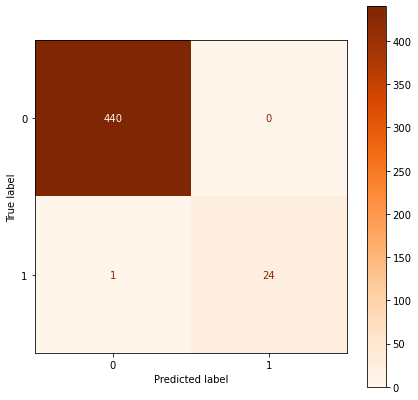

In [7]:
# Feature selection
features = ["PTS/game relative", "AST/game relative", "PER", "MP/game", "Years from prime", "All-Star?"]
X = holdout_season_1[features]
y = holdout_season_1["All-Star next season?"]

# Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Instantiating and fitting
logr = LogisticRegression()
logr.fit(X_scaled, y)
predictions = logr.predict(X_scaled)

# Printing classification report
print(classification_report(y, predictions))

# Plotting in a confusion matrix
fig, ax = plt.subplots(figsize=(7, 7))
plot_confusion_matrix(logr, X_scaled, y, ax=ax, cmap="Oranges")

# Finally, viewing the full roster predicted
prob_predictions = logr.predict_proba(X_scaled)
prob_dict = dict(zip(list(X.index), list(prob_predictions)))


eligible_players = [[player, list(chance)[1]] for player, chance in prob_dict.items()]
top_24 = [[player, chance] for player, chance in sorted(eligible_players, key=lambda item: item[1], reverse=True)][:24]
print("The predicted 24(*) All-Stars in 2016-17: {}".format(("\n" + ", ".join([(all_star[0].split(", ")[0] + "\n") for all_star in top_24]))))


## Another try, new features

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       440
           1       1.00      0.96      0.98        25

    accuracy                           1.00       465
   macro avg       1.00      0.98      0.99       465
weighted avg       1.00      1.00      1.00       465

The predicted 24(*) All-Stars in 2016-17: 
Stephen Curry
, James Harden
, Kevin Durant
, LeBron James
, Russell Westbrook
, DeMarcus Cousins
, Kyle Lowry
, DeMar DeRozan
, Anthony Davis
, Paul George
, Isaiah Thomas
, Jimmy Butler
, Kawhi Leonard
, John Wall
, Kemba Walker
, Klay Thompson
, Gordon Hayward
, Paul Millsap
, Marc Gasol
, Kyrie Irving
, Draymond Green
, Giannis Antetokounmpo
, Kevin Love
, DeAndre Jordan



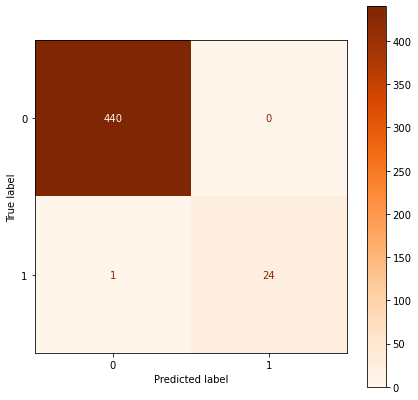

In [9]:
# Feature selection
features = ["PTS/game relative", "AST/game relative", "PER", "MP/game", "Years from prime", "All-Star?"]
X = holdout_season_1[features]
y = holdout_season_1["All-Star next season?"]

# Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Instantiating and fitting
logr = LogisticRegression()
logr.fit(X_scaled, y)
predictions = logr.predict(X_scaled)

# Printing classification report
print(classification_report(y, predictions))

# Plotting in a confusion matrix
fig, ax = plt.subplots(figsize=(7, 7))
plot_confusion_matrix(logr, X_scaled, y, ax=ax, cmap="Oranges")

# Finally, viewing the full roster predicted
prob_predictions = logr.predict_proba(X_scaled)
prob_dict = dict(zip(list(X.index), list(prob_predictions)))


eligible_players = [[player, list(chance)[1]] for player, chance in prob_dict.items()]
top_24 = [[player, chance] for player, chance in sorted(eligible_players, key=lambda item: item[1], reverse=True)][:24]
print("The predicted 24(*) All-Stars in 2016-17: {}".format(("\n" + ", ".join([(all_star[0].split(", ")[0] + "\n") for all_star in top_24]))))


Score on test set (5-fold validation): 1.0

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       111
           1       1.00      1.00      1.00         6

    accuracy                           1.00       117
   macro avg       1.00      1.00      1.00       117
weighted avg       1.00      1.00      1.00       117




(1.0,
 '              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00       111\n           1       1.00      1.00      1.00         6\n\n    accuracy                           1.00       117\n   macro avg       1.00      1.00      1.00       117\nweighted avg       1.00      1.00      1.00       117\n',
 array([[111,   0],
        [  0,   6]]))

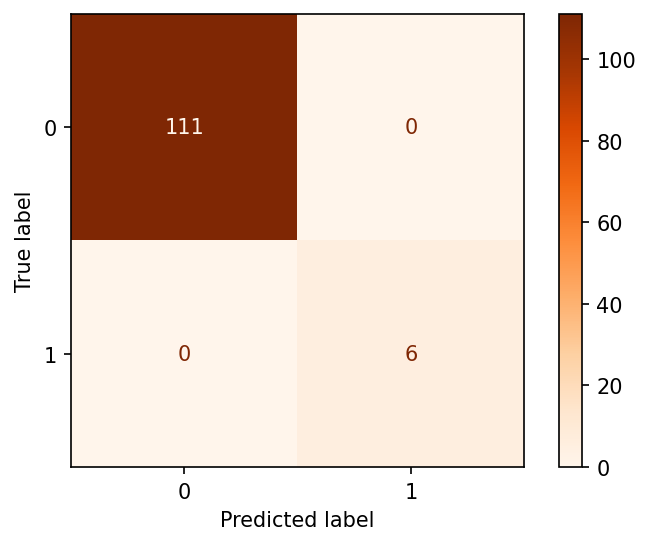

In [6]:
nba_log_regression(holdout_season_1, ["PTS/game relative", "AST/game relative", "PER", "MP/game", "Years in prime", "All-Star?"], "All-Star next season?", print_all=True)